# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

rho: 0.8
ADF Statistic: -5.503382
p-value: 0.000002
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.81
ADF Statistic: -5.364747
p-value: 0.000004
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.82
ADF Statistic: -4.286512
p-value: 0.000469
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.83
ADF Statistic: -4.153828
p-value: 0.000788
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.84
ADF Statistic: -4.689541
p-value: 0.000088
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.85
ADF Statistic: -3.912351
p-value: 0.001946
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.86
ADF Statistic: -3.499387
p-value: 0.008003
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.87
ADF Statistic: -2.580127
p-value: 0.097175
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.88
ADF Statistic: -5.454045
p-value: 0.000003
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
rho: 0.89
ADF Statistic: -3.655619
p-v

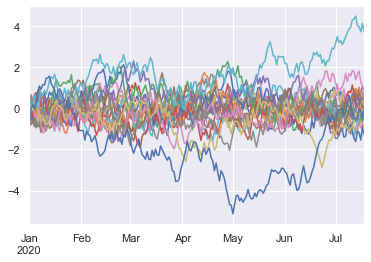

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from statsmodels.tsa.stattools import adfuller

#pd.seed(123)

def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

#values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
values= [0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]

for idx in values:
        
    ts1 = ts(rho=idx)
    ts1.plot()
    result = adfuller(ts1)
    print('rho:',idx)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# 02.2 Download and explore one series from google trends

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
Week                       261 non-null object
travel: (United States)    261 non-null int64
hotel: (United States)     261 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2015-06-21 to 2020-06-14
Data columns (total 2 columns):
travel    261 non-null int64
hotel     261 non-null int64
dtypes: int64(2)
memory usage: 6.1 KB


,travel,hotel
week,,
2015-06-21,30,79
2015-06-28,30,78
2015-07-05,31,82
2015-07-12,30,83
2015-07-19,31,84


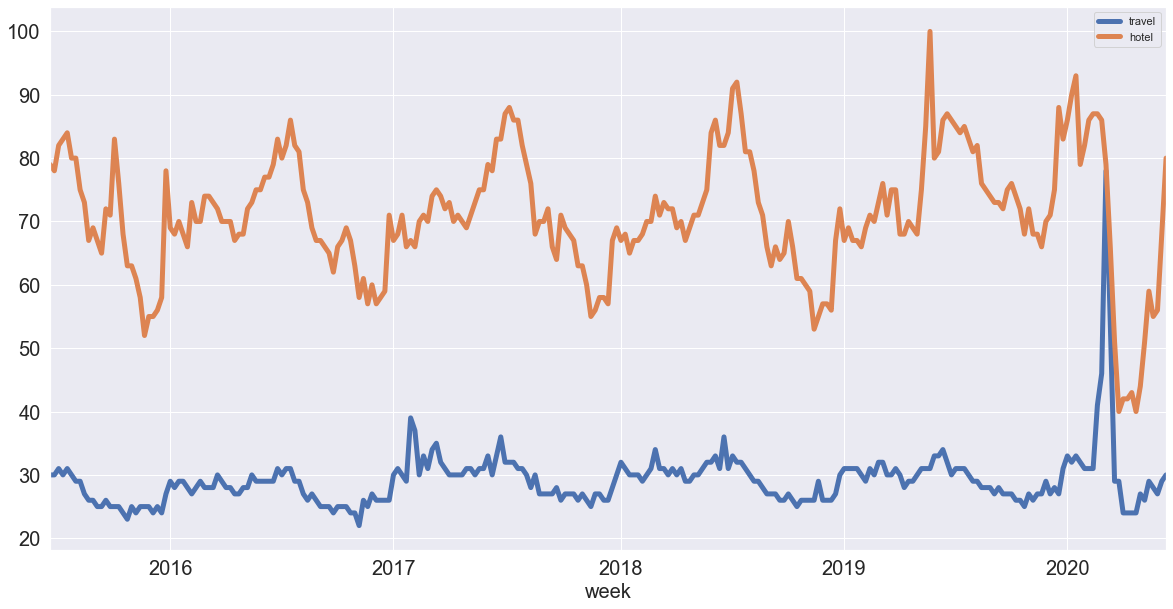

In [15]:
df = pd.read_csv('../datasets/multiTimeline.csv', skiprows=1)
df.head()
df.info()
df.columns = ['week', 'travel', 'hotel']
df.week = pd.to_datetime(df.week)
df.set_index('week', inplace=True)
df.head()
df.info()
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('week', fontsize=20);
df.head()

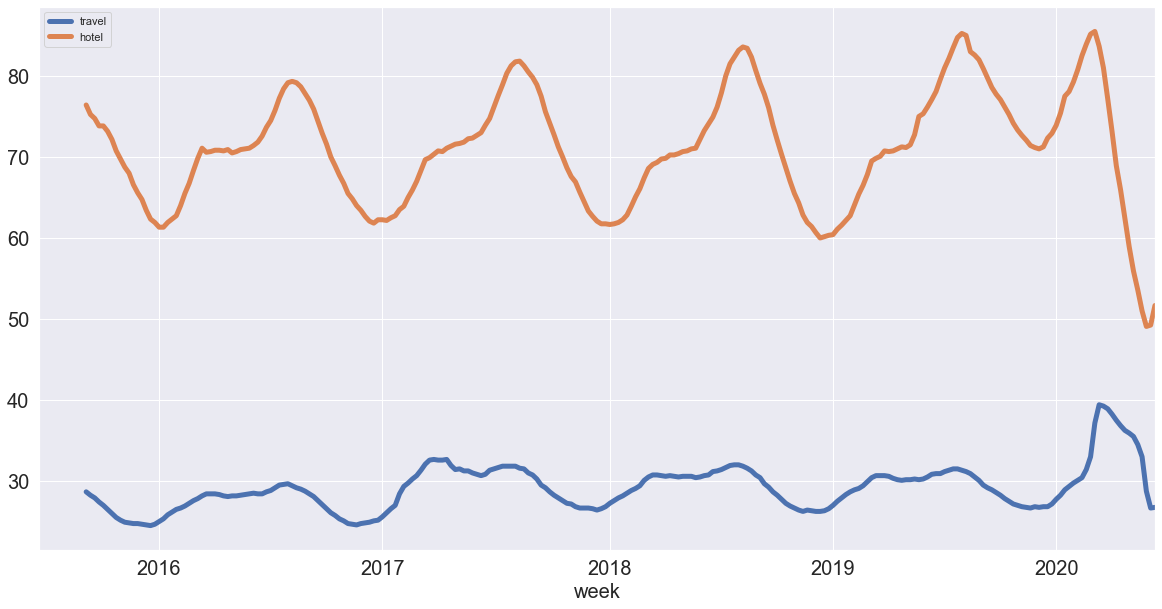

In [17]:
travel = df[['travel','hotel']]
travel.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('week', fontsize=20);

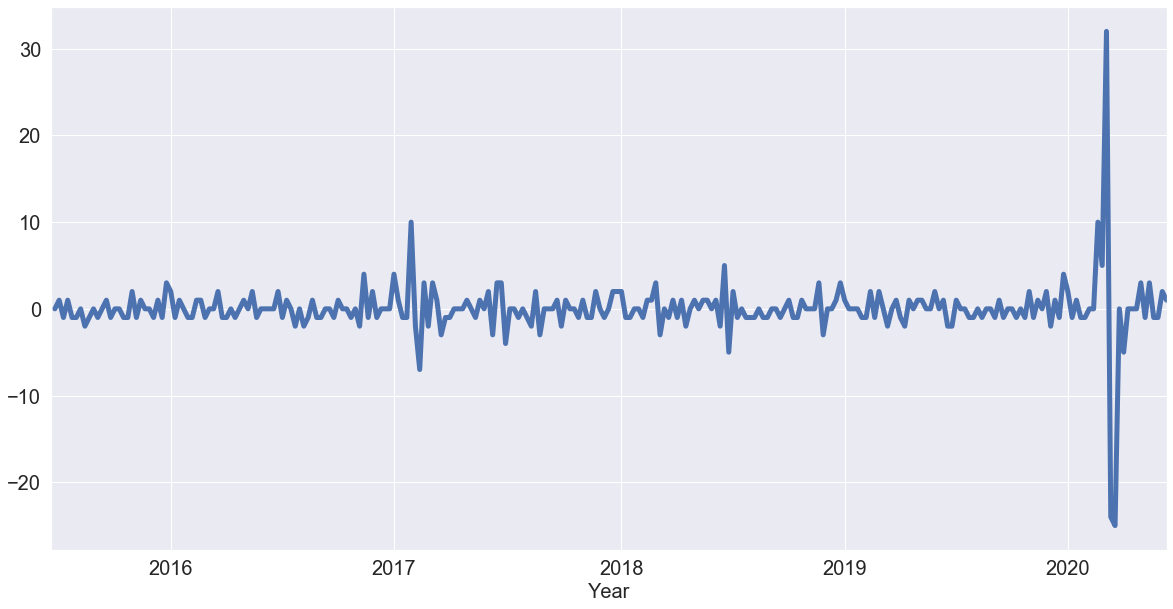

In [21]:
df.travel.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [26]:
df.diff().corr()


,travel,hotel
travel,1.000000,0.200373
hotel,0.200373,1.000000


In [25]:
df.corr()

,travel,hotel
travel,1.000000,0.420037
hotel,0.420037,1.000000


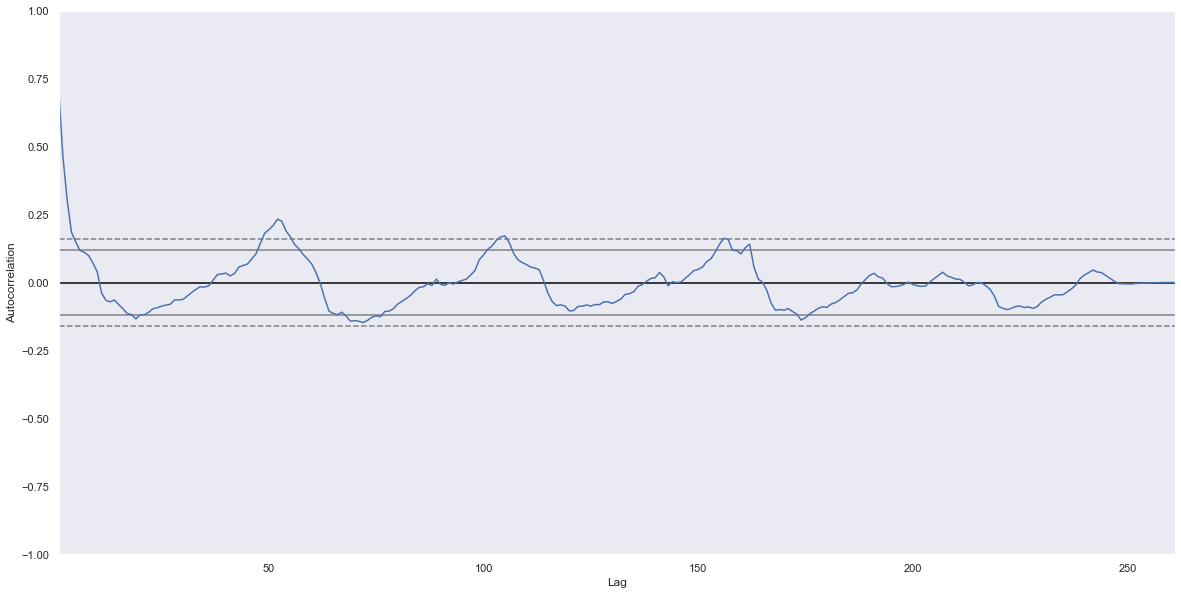

In [22]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df.travel);

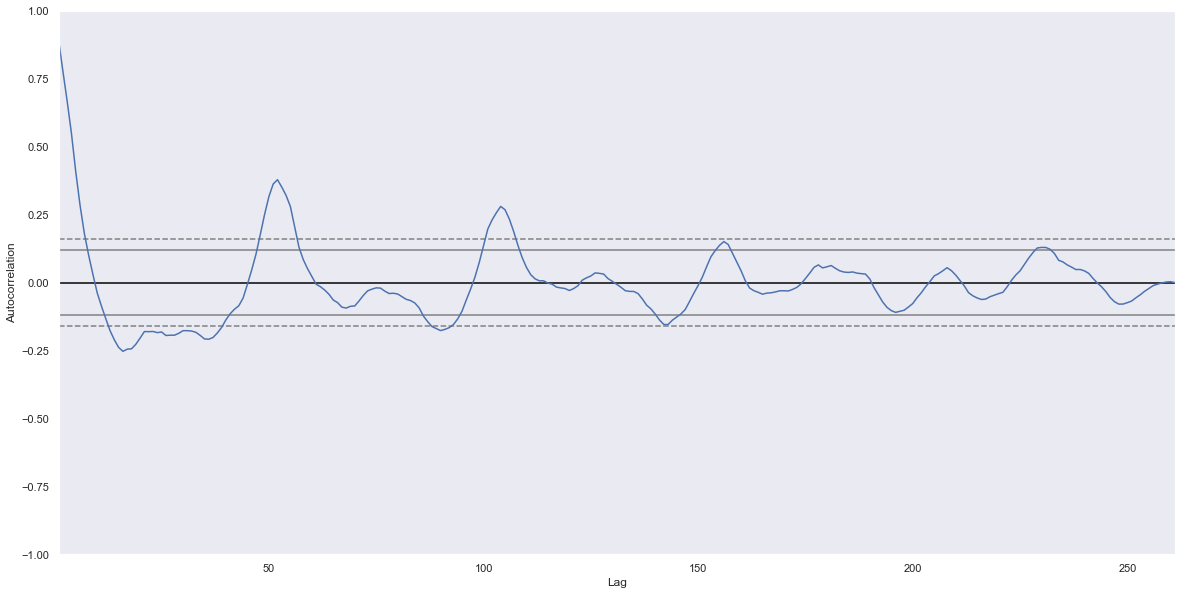

In [23]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df.hotel);